In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov 17 11:47:47 2022

@author: oiseth
"""

import numpy as np
import sys
sys.path.append(r"C:\Users\alasm\Masteroppgave\w3tp")
import w3t as w3t
print(w3t.__file__)
import os
import h5py
from matplotlib import pyplot as plt
import time
import pandas as pd

C:\Users\alasm\Masteroppgave\w3tp\w3t\__init__.py


In [2]:
section_height = 3.33/100
section_width =  18.3/100
section_length_1 = 2.68
section_length_2 = 2.66

In [3]:
#%% Load all experiments
def load_and_process_static_coeff(h5_input_path, section_name, file_names, filter_order = 6, filter_cutoff_frequency = 2, mode="decks", upwind_in_rig=True):
    """Gather, filter, calculate and plot static coeff for."""
 
    h5_file = os.path.join(h5_input_path, section_name)
    f = h5py.File((h5_file + ".hdf5"), "r")
 
    exp0 = w3t.Experiment.fromWTT(f[file_names[0]])
    exp1 = w3t.Experiment.fromWTT(f[file_names[1]])
 
    exp0.filt_forces(filter_order, filter_cutoff_frequency)
    exp1.filt_forces(filter_order, filter_cutoff_frequency)

    if upwind_in_rig == True:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=True)
    elif upwind_in_rig == False:
        static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=False)
    
    #static_coeff.plot_drag_mean(mode=mode)
    #static_coeff.plot_lift_mean(mode=mode)
    #static_coeff.plot_pitch_mean(mode=mode)

    #static_coeff.plot_drag(mode=mode)
    #static_coeff.plot_lift(mode=mode)
    #static_coeff.plot_pitch(mode=mode)
    
    plt.show()
    return exp0,exp1,static_coeff

tic = time.perf_counter()
plt.close("all")

section_name = "4D_Upstream_Stat"

section_height = 3.33/100
section_width =  18.3/100
section_length_1 = 2.68
section_length_2 = 2.66

#%% Load all experiments
h5_input_file = ".\\\Data_h5\\Static\\" 
h5_file = os.path.join(h5_input_file, section_name)
f = h5py.File((h5_file + ".hdf5"), "r")

exp0 = w3t.Experiment.fromWTT(f["HAR_INT_MUS_GAP_45D_02_00_000"])
exp0.plot_experiment()
exp1 = w3t.Experiment.fromWTT(f["HAR_INT_MUS_GAP_45D_02_00_004"])
exp1.plot_experiment()

#%% filter measured forces and plot filtered experiments
filter_order = 6
filter_cutoff_frequency = 2
exp0.filt_forces(filter_order,filter_cutoff_frequency)
exp1.filt_forces(filter_order,filter_cutoff_frequency)
 
exp0.plot_experiment()
exp1.plot_experiment()

#%% obtain static coeff
static_coeff = w3t.StaticCoeff.fromWTT(exp0,exp1,section_width,section_height,section_length_1, section_length_2, upwind_in_rig=False)

#%%

static_coeff.plot_drag_mean(mode="decks")
static_coeff.plot_lift_mean(mode="decks")
static_coeff.plot_pitch_mean(mode="decks")

plt.show()


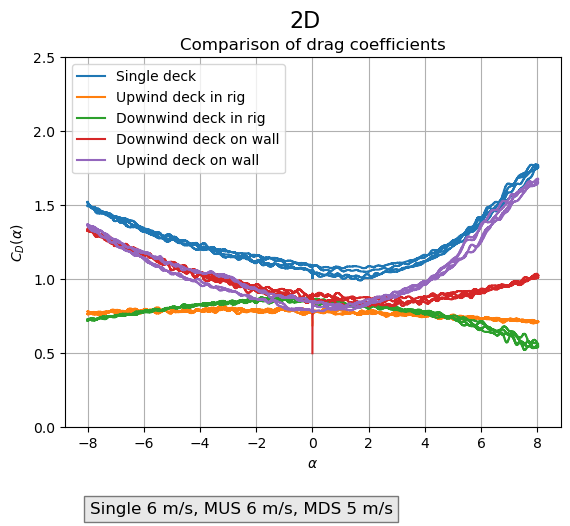

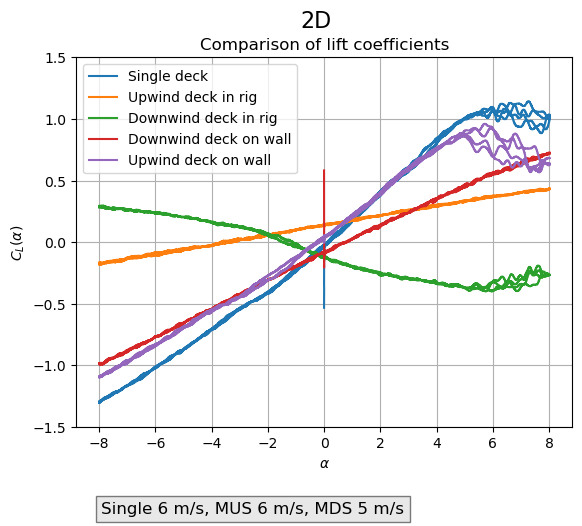

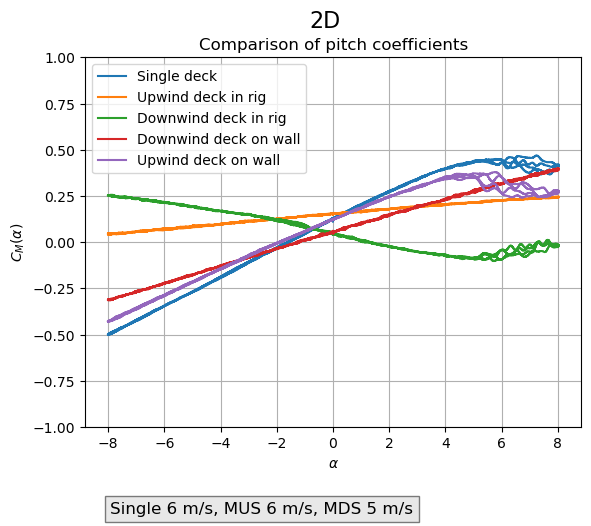

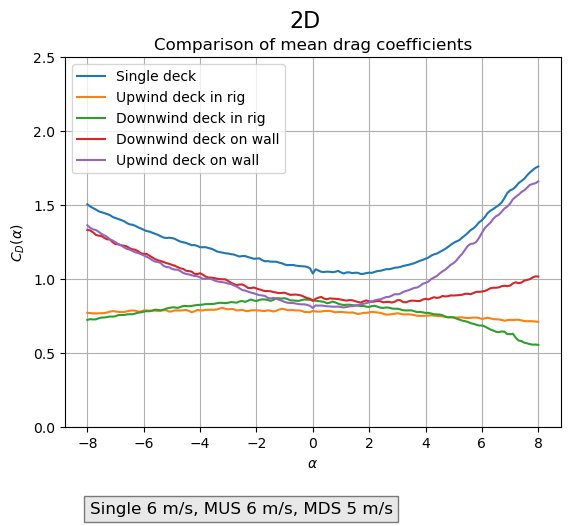

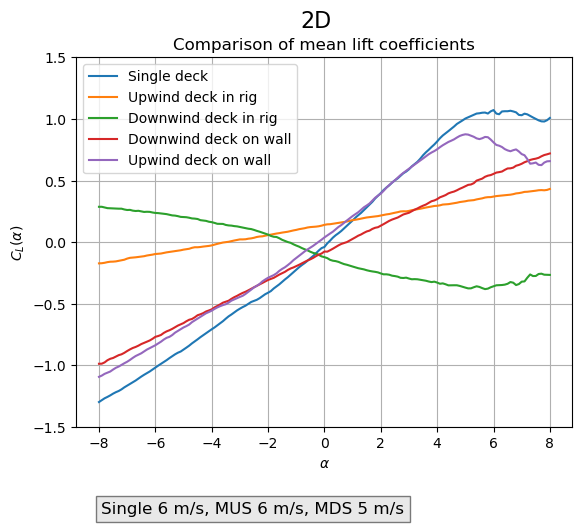

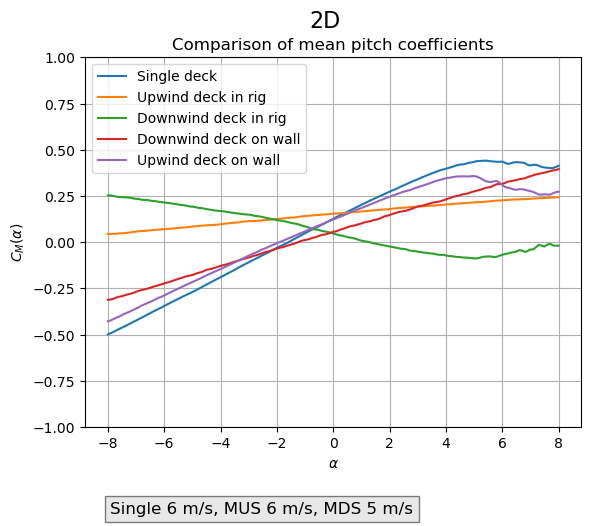

In [13]:
#2D lavere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "1"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_005"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_2D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_00_001","HAR_INT_MUS_GAP_213D_02_00_002"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_2D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_00_000","HAR_INT_MDS_GAP_213D_02_00_001"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "2D"
fart = 'Single 6 m/s, MUS 6 m/s, MDS 5 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

static_coeff_single.save_mean_static_coeff("Single_Static.npz", path=".\\\static_npz\\", mode="single")
static_coeff_up.save_mean_static_coeff("MUS_3D_Static.npz", path=".\\\static_npz\\", mode="decks")
static_coeff_down.save_mean_static_coeff("MDS_3D_Static.npz", path=".\\\static_npz\\", mode="decks")

data = np.load(r".\Static_coeff\coefficients.npz")
print(data.files)

print(data["alpha"].shape)
      
alpha = data["cd_in_rig"]
print(alpha)

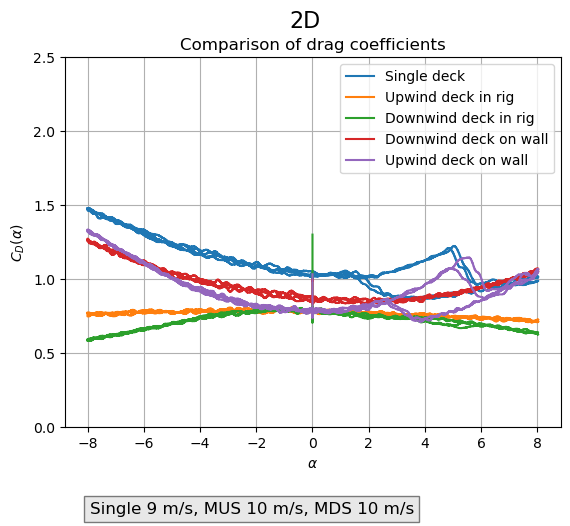

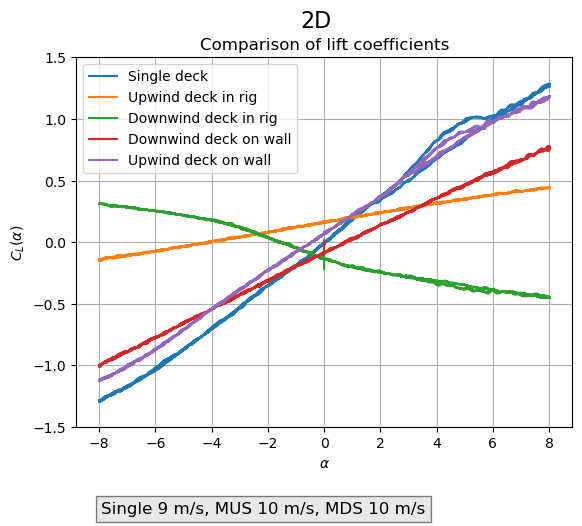

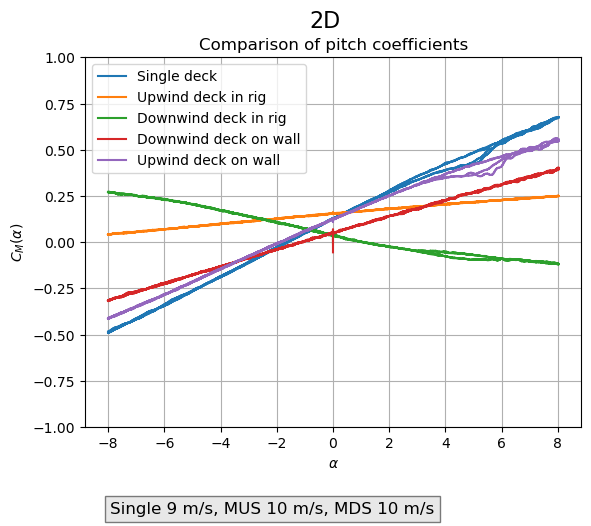

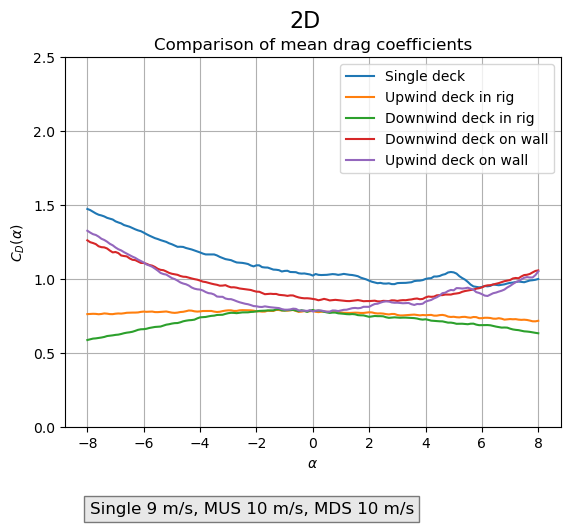

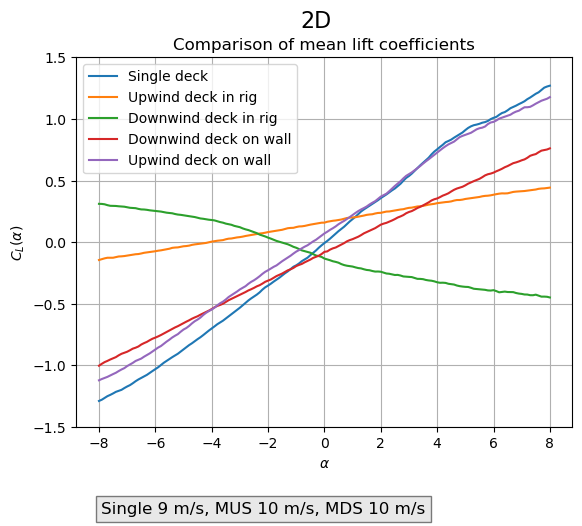

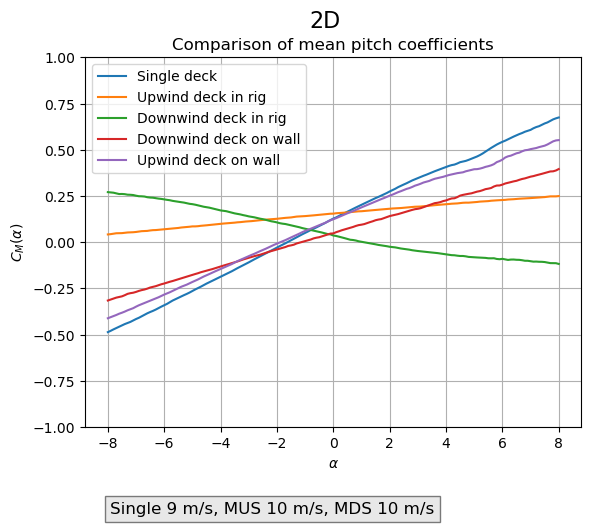

In [14]:
#2D høyere hastighetere
h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "2"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_004"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_2D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_00_001","HAR_INT_MUS_GAP_213D_02_00_004"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_2D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_00_000","HAR_INT_MDS_GAP_213D_02_00_003"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "2D"
fart = 'Single 9 m/s, MUS 10 m/s, MDS 10 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

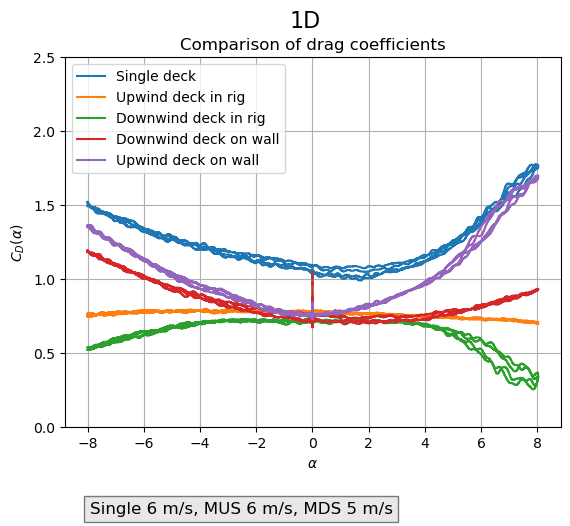

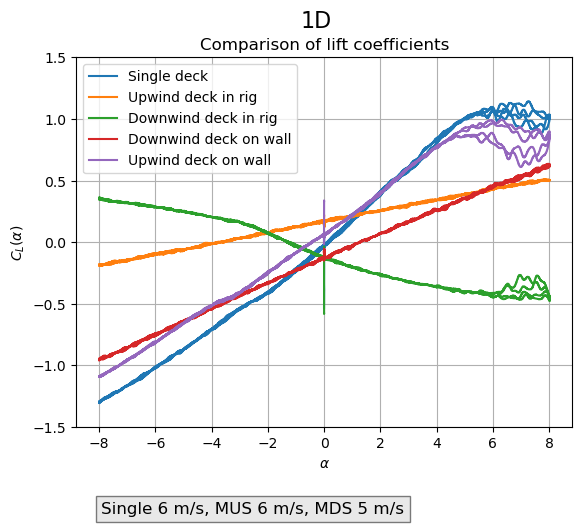

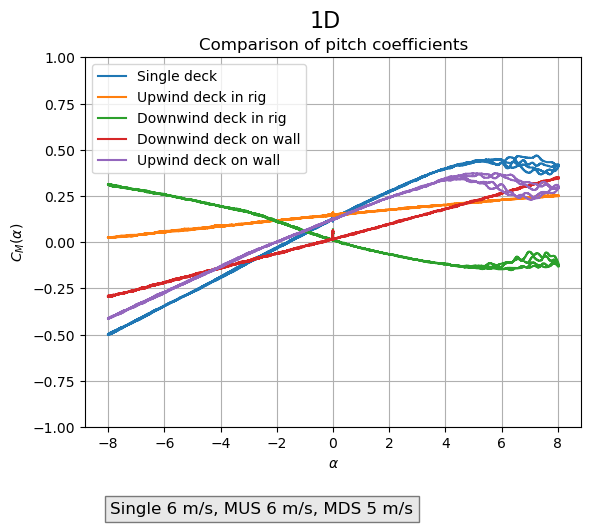

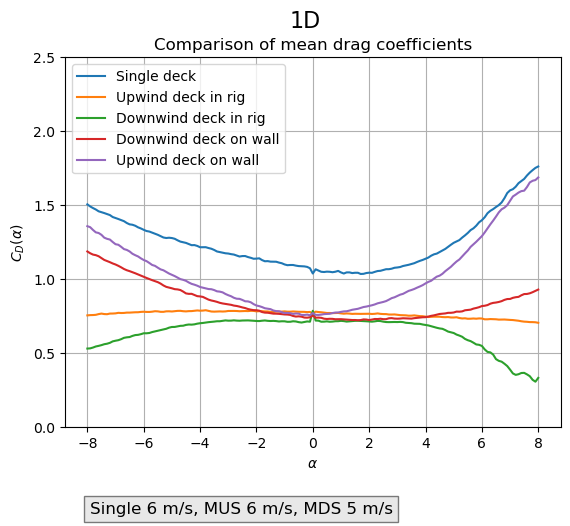

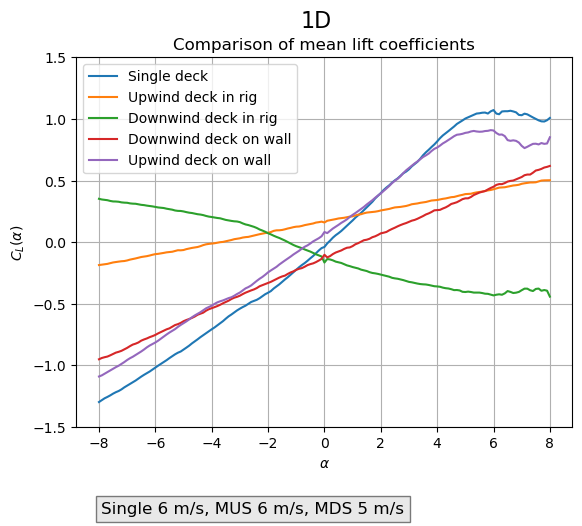

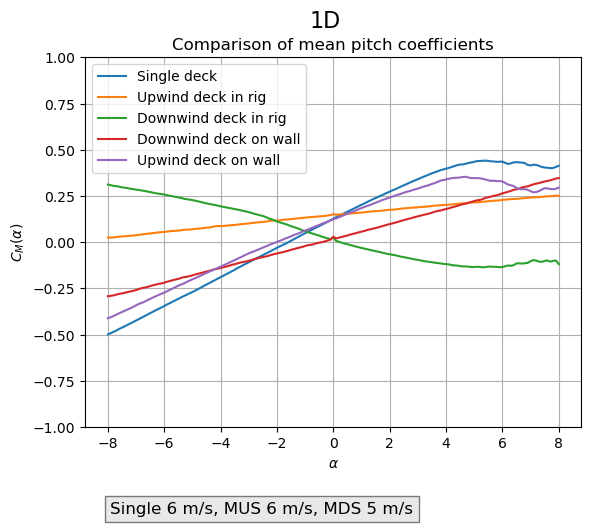

In [22]:
#1D lavere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "1"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_005"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_1D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_02_000","HAR_INT_MUS_GAP_213D_02_02_001"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_1D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_01_000","HAR_INT_MDS_GAP_213D_02_01_001"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "1D"
fart = 'Single 6 m/s, MUS 6 m/s, MDS 5 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

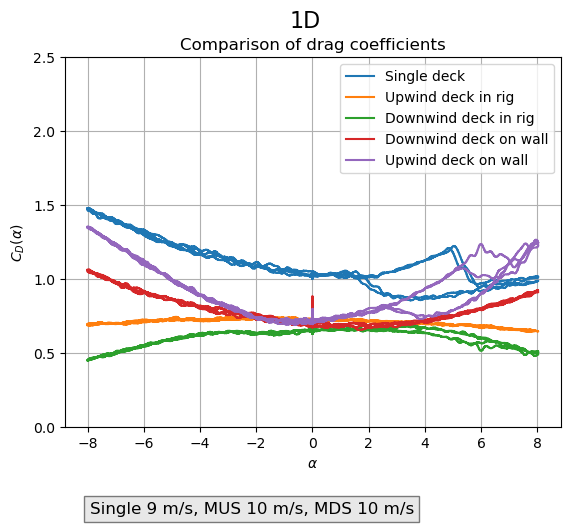

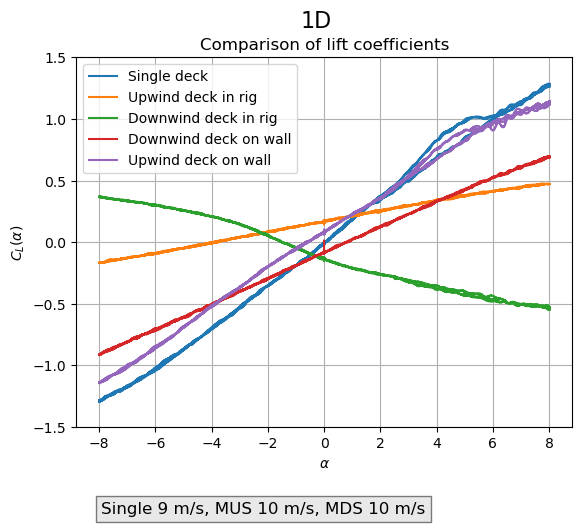

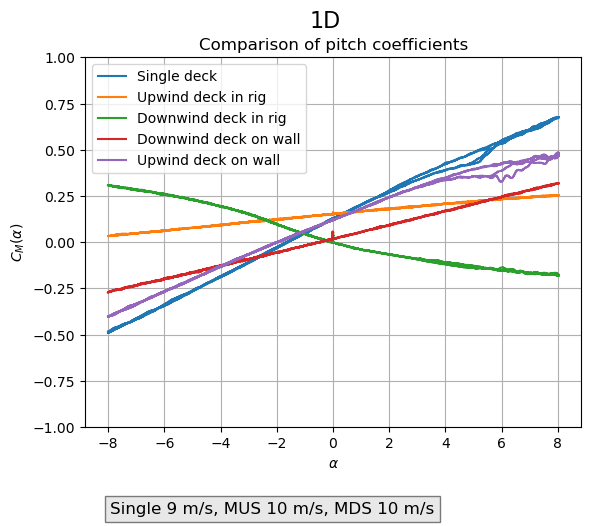

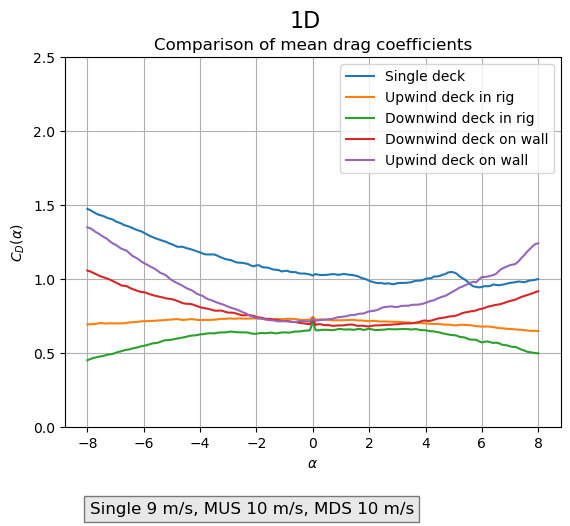

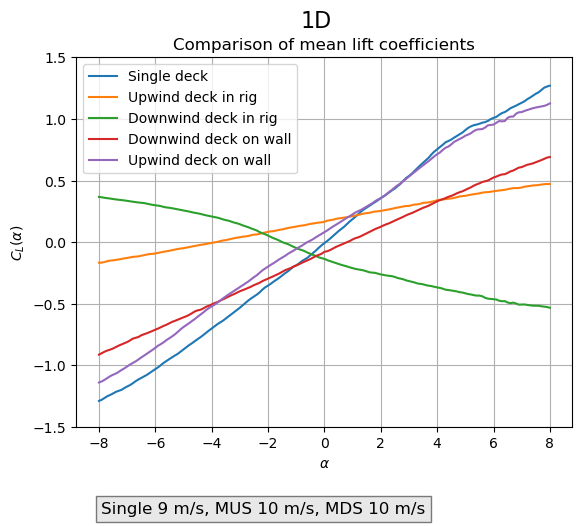

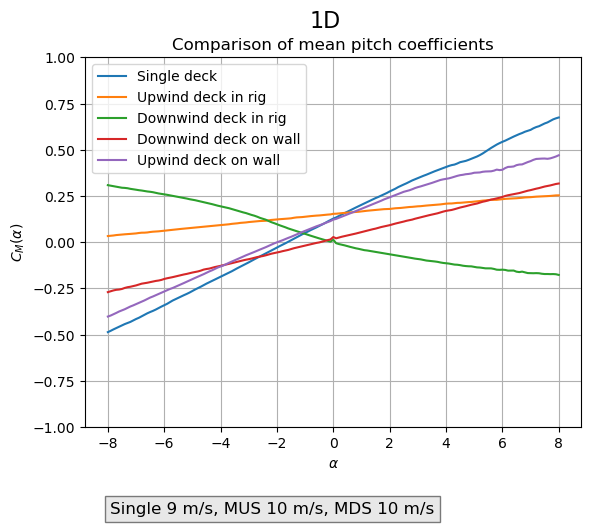

In [15]:
#1D høyere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "2"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_004"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_1D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_02_000","HAR_INT_MUS_GAP_213D_02_02_003"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_1D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_01_000","HAR_INT_MDS_GAP_213D_02_01_003"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "1D"
fart = 'Single 9 m/s, MUS 10 m/s, MDS 10 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

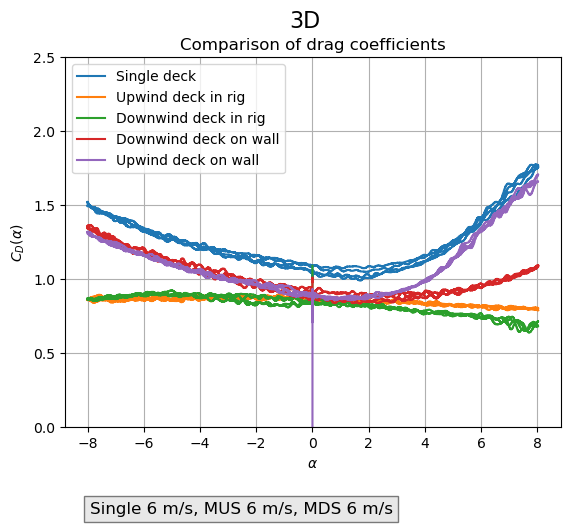

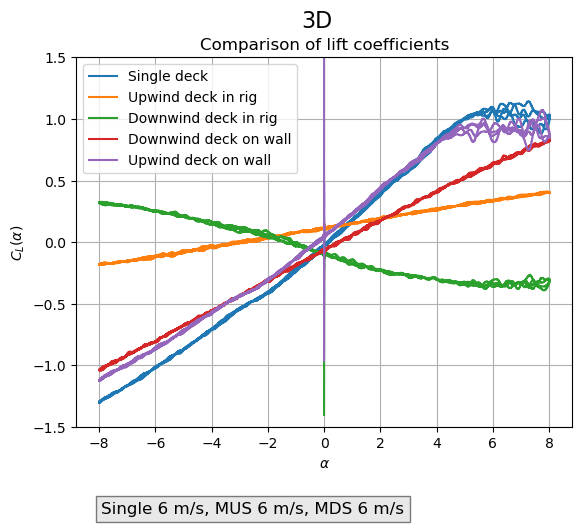

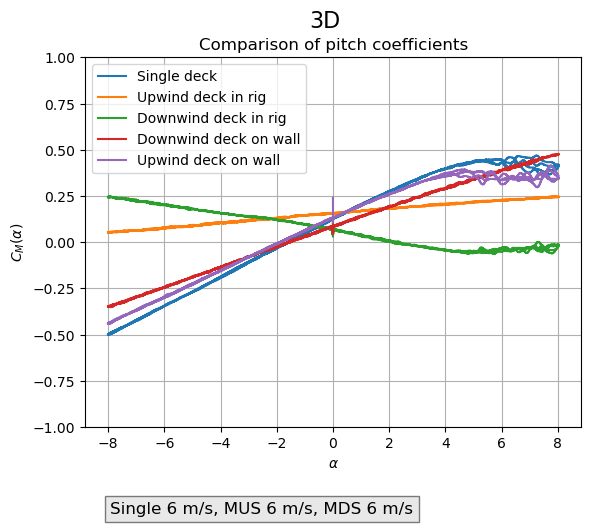

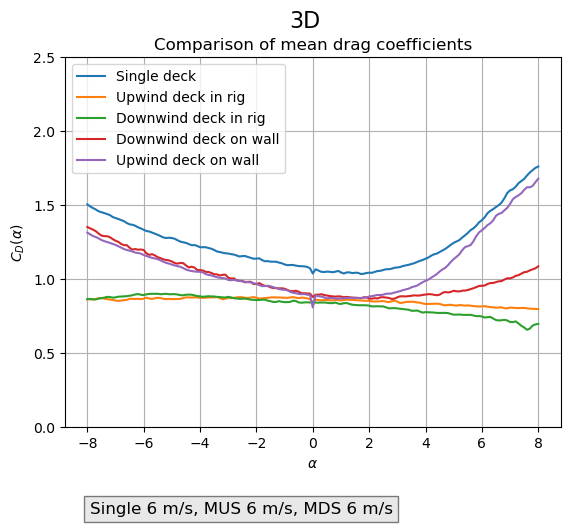

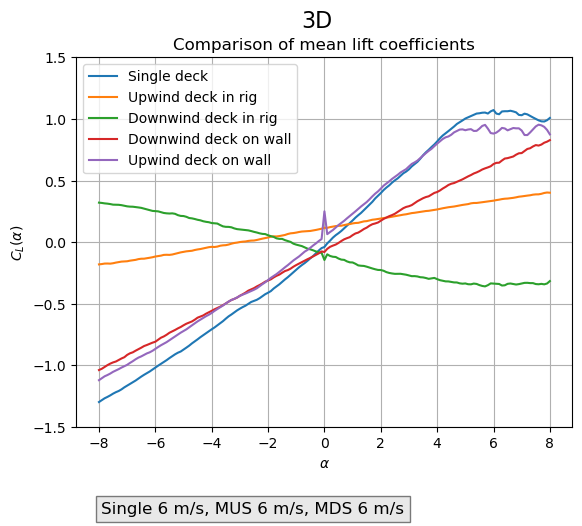

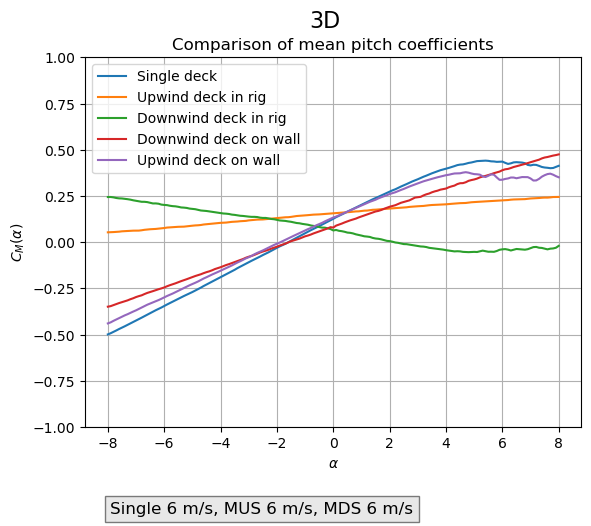

In [16]:
#3D lavere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "1"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_005"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_3D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_01_000","HAR_INT_MUS_GAP_213D_02_01_001"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_3D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_02_000","HAR_INT_MDS_GAP_213D_02_02_003"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "3D"
fart = 'Single 6 m/s, MUS 6 m/s, MDS 6 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

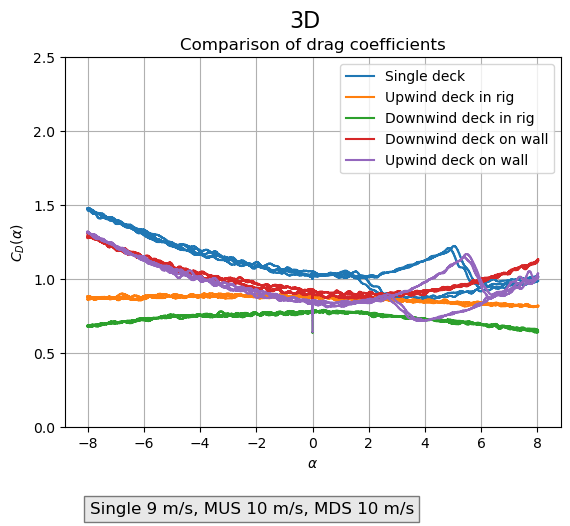

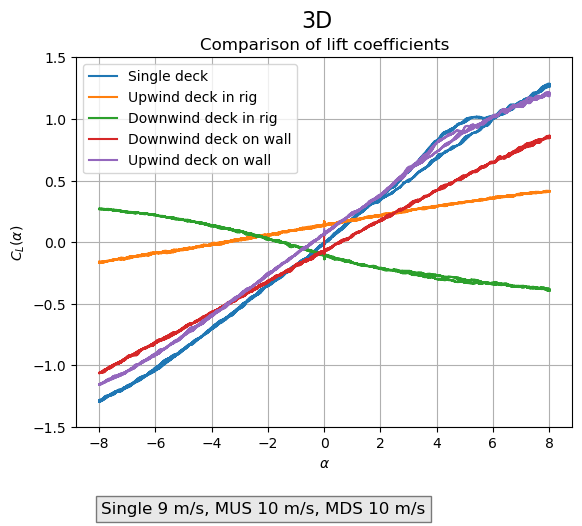

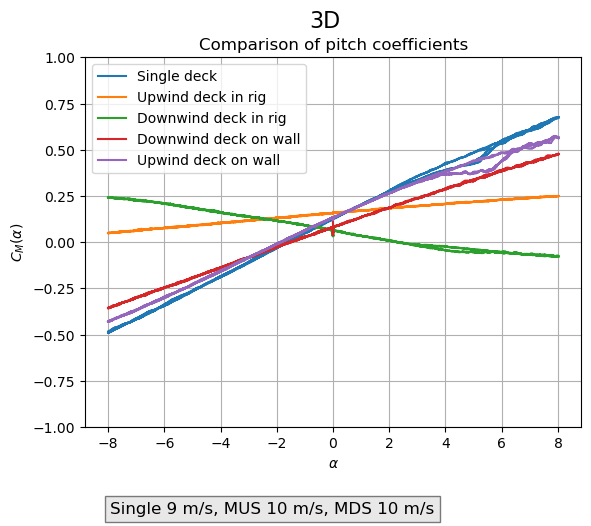

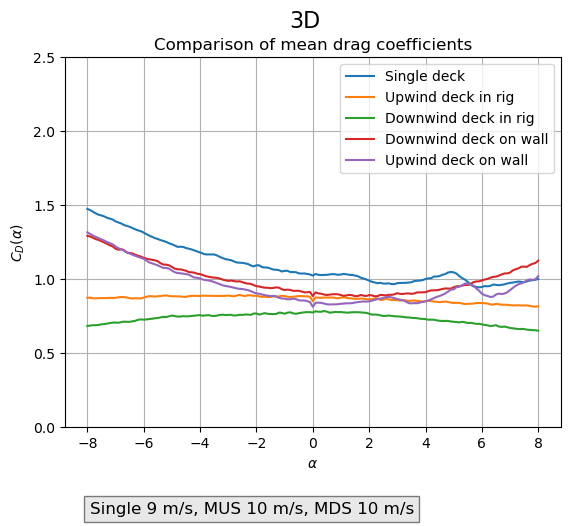

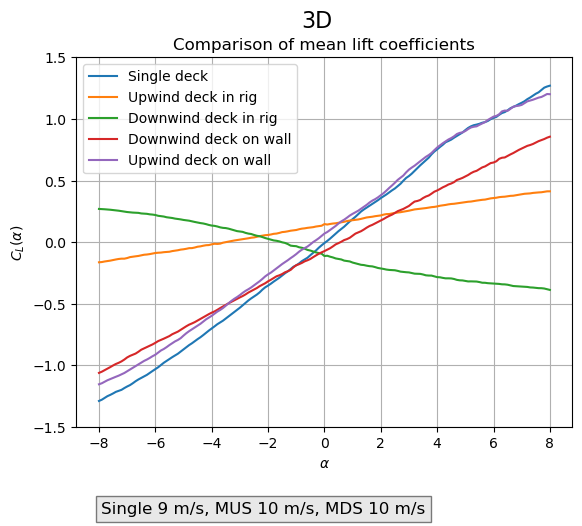

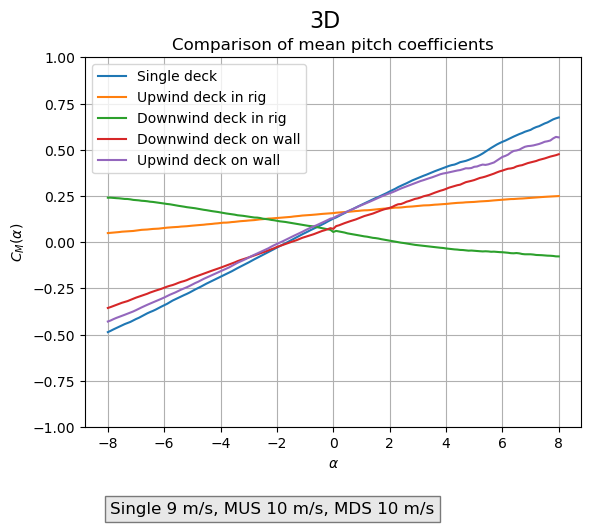

In [17]:
#3D høyere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "2"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_004"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_3D_Static"
file_names = ["HAR_INT_MUS_GAP_213D_02_01_000","HAR_INT_MUS_GAP_213D_02_01_003"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_3D_Static"
file_names = ["HAR_INT_MDS_GAP_213D_02_02_000","HAR_INT_MDS_GAP_213D_02_02_005"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "3D"
fart = 'Single 9 m/s, MUS 10 m/s, MDS 10 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

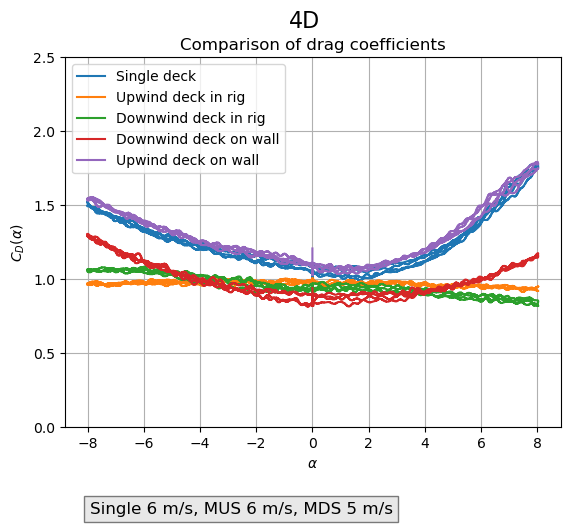

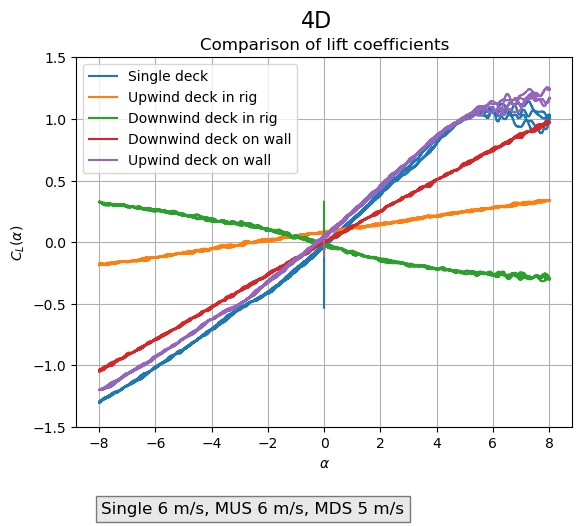

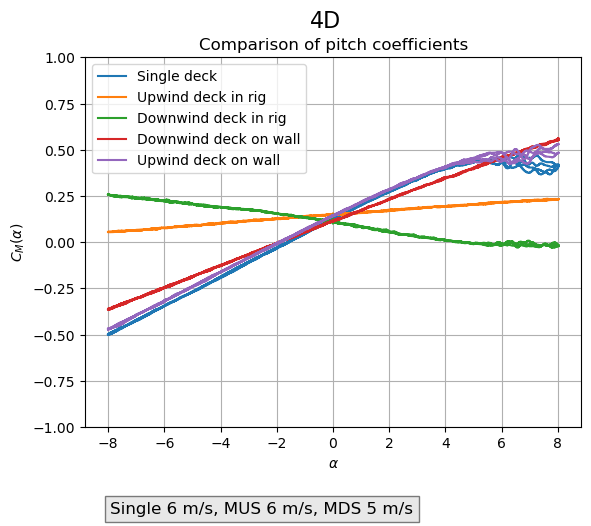

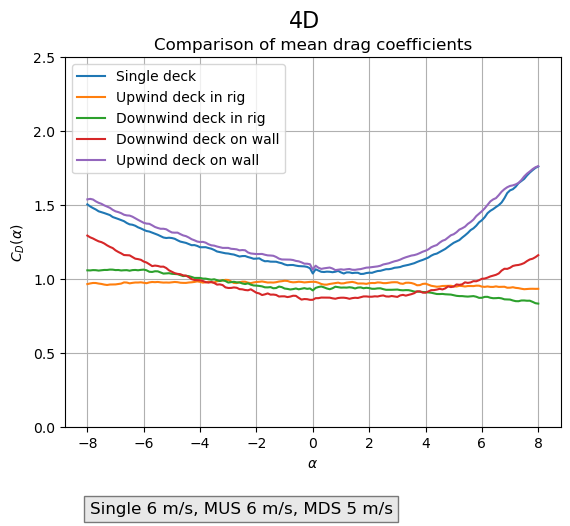

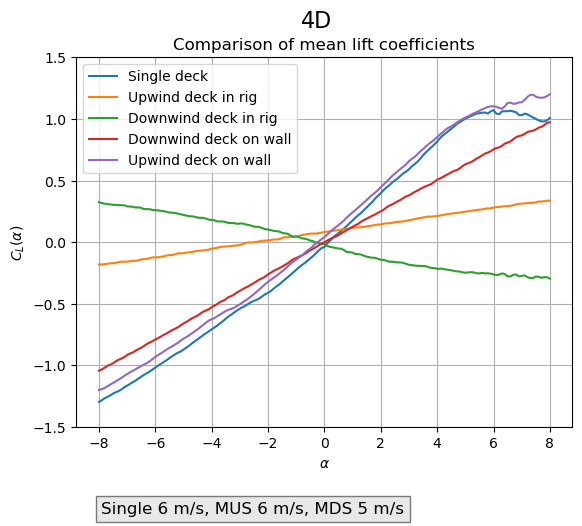

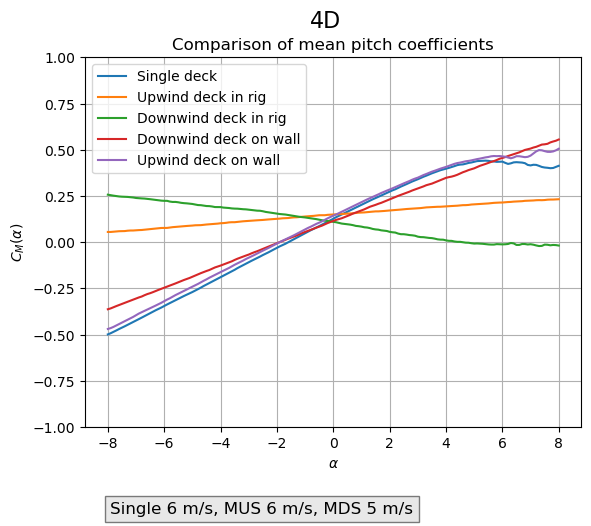

In [21]:
#4D lavere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "1"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_005"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_4D_Static"
file_names = ["HAR_INT_MUS_GAP_45D_02_00_000","HAR_INT_MUS_GAP_45D_02_00_001"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_4D_Static"
file_names = ["HAR_INT_MDS_GAP_45D_02_00_001","HAR_INT_MDS_GAP_45D_02_00_003"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "4D"
fart = 'Single 6 m/s, MUS 6 m/s, MDS 5 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

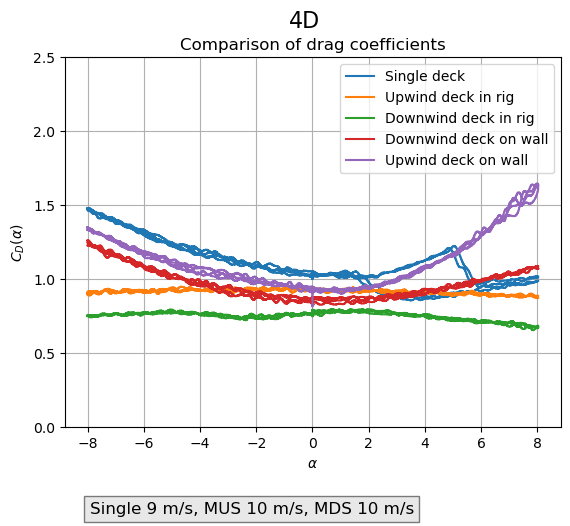

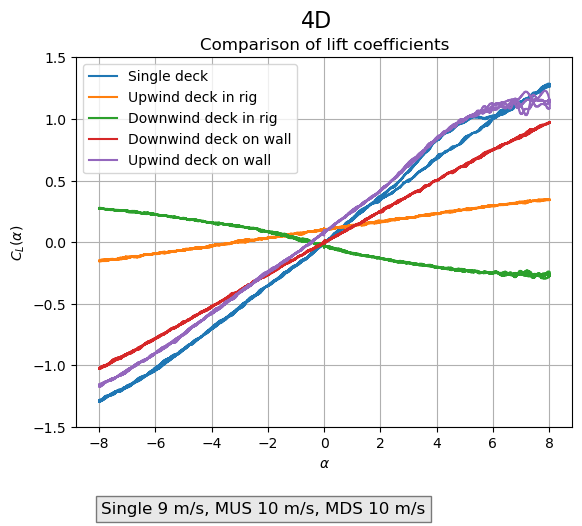

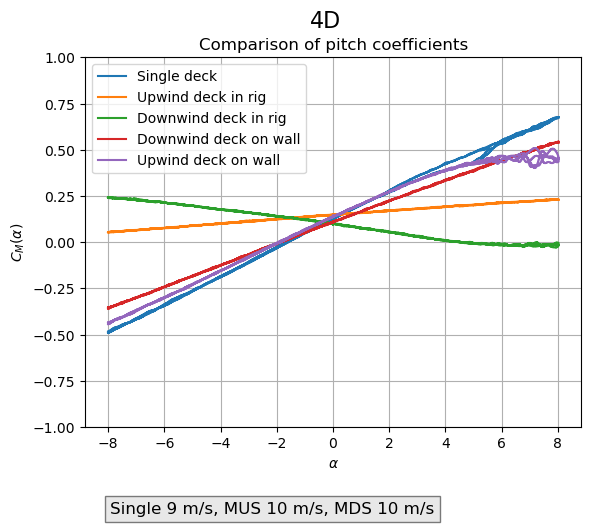

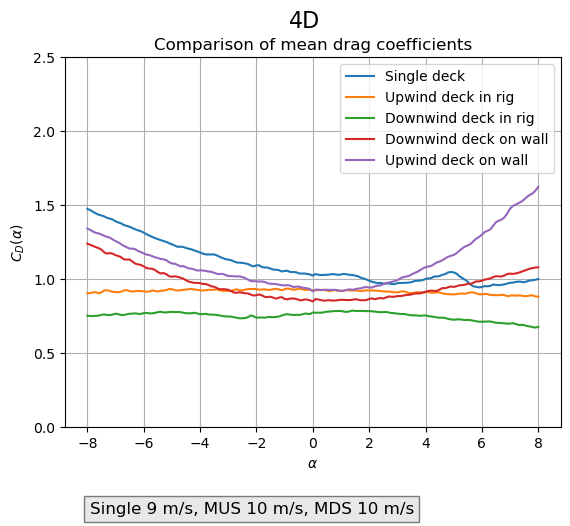

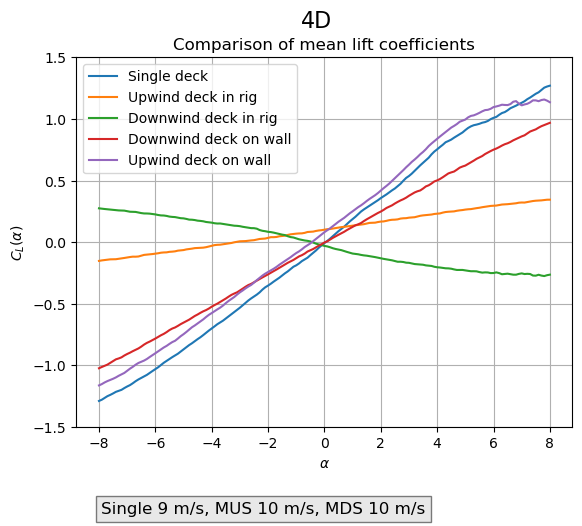

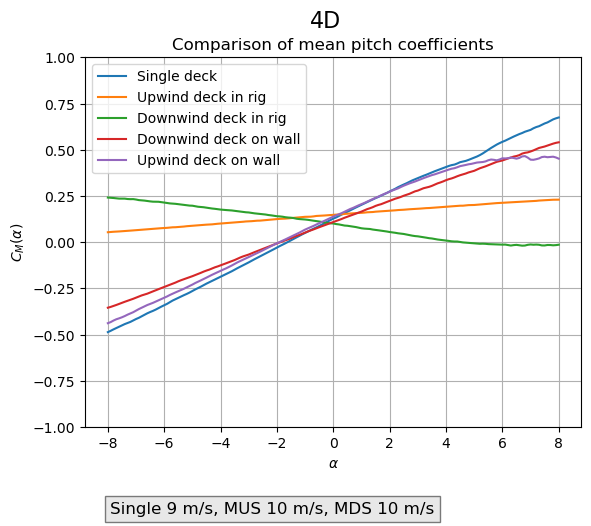

In [23]:
#4D høyere hastighetere

h5_input_path = h5_input_file = ".\\\H5F\\Static\\" 
file_path = ".\\Plots\\"
number = "2"


#%% Load single deck
section_name = "Single_Static"
file_names = ["HAR_INT_SINGLE_02_00_003","HAR_INT_SINGLE_02_00_004"]
exp0_single, exp1_single, static_coeff_single = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="single", upwind_in_rig=True)

#%% Load all upstream_static experiments (downwind in rig)
section_name = "MUS_4D_Static"
file_names = ["HAR_INT_MUS_GAP_45D_02_00_000","HAR_INT_MUS_GAP_45D_02_00_004"]
exp0_up, exp1_up, static_coeff_up = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=False)

#%% Load all downstream_static experiments (upwind in rig)
section_name = "MDS_4D_Static"
file_names = ["HAR_INT_MDS_GAP_45D_02_00_001","HAR_INT_MDS_GAP_45D_02_00_005"]
exp0_down, exp1_down, static_coeff_down = load_and_process_static_coeff(h5_input_path, section_name, file_names, mode="decks", upwind_in_rig=True)
 
plt.show()

section_name = "4D"
fart = 'Single 9 m/s, MUS 10 m/s, MDS 10 m/s'

w3t._scoff.plot_compare_drag(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_drag_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_drag_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_lift_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_lift_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()

w3t._scoff.plot_compare_pitch_mean(static_coeff_single, static_coeff_up, static_coeff_down)
plt.gcf().suptitle(f"{section_name}", fontsize=16)
plt.text(0.05, -0.2, fart, fontsize=12,
         bbox=dict(facecolor='lightgray', alpha=0.5),
         ha='left', va='top', transform=plt.gca().transAxes)

file_name = f'{section_name}_pitch_mean{number}.png'
full_path = os.path.join(file_path, file_name)
os.makedirs(file_path, exist_ok=True)
plt.savefig(full_path)
plt.show()